In [1]:
#######--------importing libraries------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from textblob import TextBlob
from sklearn.model_selection import train_test_split

In [2]:
######---------importing dataset-----------

data= pd.read_csv('/home/nexg/Desktop/sf_shared/Online_Review_New.csv')

In [3]:
data

,S.no,Review,NEGATIVE...POSITIVE
0,1,I have purchased a mobile phone (Samsung J7) o...,POSITIVE
1,2,I have ordered lots of electronic gadgets incl...,POSITIVE
2,3,I had order a bablet cost 1500 ..on 30oct deli...,NEGATIVE
3,4,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
4,5,Amazon is the best but at this time offer prod...,POSITIVE
5,6,As always amazon is giving its customers a top...,POSITIVE
6,7,i purchase many item with the amazon. they ar...,POSITIVE
7,8,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
8,9,very good site timely delivery good packing ni...,POSITIVE
9,10,good product but with shipping charge,POSITIVE


In [4]:
data.describe()

,S.no
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [5]:
data.head(10)

,S.no,Review,NEGATIVE...POSITIVE
0,1,I have purchased a mobile phone (Samsung J7) o...,POSITIVE
1,2,I have ordered lots of electronic gadgets incl...,POSITIVE
2,3,I had order a bablet cost 1500 ..on 30oct deli...,NEGATIVE
3,4,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
4,5,Amazon is the best but at this time offer prod...,POSITIVE
5,6,As always amazon is giving its customers a top...,POSITIVE
6,7,i purchase many item with the amazon. they ar...,POSITIVE
7,8,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
8,9,very good site timely delivery good packing ni...,POSITIVE
9,10,good product but with shipping charge,POSITIVE


In [6]:
print(data.shape)
data.head(10)

(1000, 3)


,S.no,Review,NEGATIVE...POSITIVE
0,1,I have purchased a mobile phone (Samsung J7) o...,POSITIVE
1,2,I have ordered lots of electronic gadgets incl...,POSITIVE
2,3,I had order a bablet cost 1500 ..on 30oct deli...,NEGATIVE
3,4,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
4,5,Amazon is the best but at this time offer prod...,POSITIVE
5,6,As always amazon is giving its customers a top...,POSITIVE
6,7,i purchase many item with the amazon. they ar...,POSITIVE
7,8,"The Best big Giant in India ,Amazon Is the bes...",POSITIVE
8,9,very good site timely delivery good packing ni...,POSITIVE
9,10,good product but with shipping charge,POSITIVE


In [7]:
######------------------cleaning process step1 removing numbers--------------
data['Review']=data['Review'].str.replace("[^a-zA-Z#]", " ")
data.head(10)

,S.no,Review,NEGATIVE...POSITIVE
0,1,I have purchased a mobile phone Samsung J o...,POSITIVE
1,2,I have ordered lots of electronic gadgets incl...,POSITIVE
2,3,I had order a bablet cost on oct deli...,NEGATIVE
3,4,The Best big Giant in India Amazon Is the bes...,POSITIVE
4,5,Amazon is the best but at this time offer prod...,POSITIVE
5,6,As always amazon is giving its customers a top...,POSITIVE
6,7,i purchase many item with the amazon they ar...,POSITIVE
7,8,The Best big Giant in India Amazon Is the bes...,POSITIVE
8,9,very good site timely delivery good packing ni...,POSITIVE
9,10,good product but with shipping charge,POSITIVE


In [8]:
######------------- cleaning process step2 --- converting all letter into lower case----------

In [8]:
data['Review']=data['Review'].str.lower()
data.head(10)

,S.no,Review,NEGATIVE...POSITIVE
0,1,i have purchased a mobile phone samsung j o...,POSITIVE
1,2,i have ordered lots of electronic gadgets incl...,POSITIVE
2,3,i had order a bablet cost on oct deli...,NEGATIVE
3,4,the best big giant in india amazon is the bes...,POSITIVE
4,5,amazon is the best but at this time offer prod...,POSITIVE
5,6,as always amazon is giving its customers a top...,POSITIVE
6,7,i purchase many item with the amazon they ar...,POSITIVE
7,8,the best big giant in india amazon is the bes...,POSITIVE
8,9,very good site timely delivery good packing ni...,POSITIVE
9,10,good product but with shipping charge,POSITIVE


In [10]:
######-------------- cleaning process step3----- removing stopwords-----------

In [9]:
stop_words = stopwords.words('english')
data['stopwords'] = data['Review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
data[['Review','stopwords']].head(10)

,Review,stopwords
0,i have purchased a mobile phone samsung j o...,18
1,i have ordered lots of electronic gadgets incl...,10
2,i had order a bablet cost on oct deli...,35
3,the best big giant in india amazon is the bes...,14
4,amazon is the best but at this time offer prod...,8
5,as always amazon is giving its customers a top...,108
6,i purchase many item with the amazon they ar...,30
7,the best big giant in india amazon is the bes...,14
8,very good site timely delivery good packing ni...,1
9,good product but with shipping charge,2


In [10]:
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data['Review'].head(10)

0    purchased mobile phone samsung j amazon th oct...
1    ordered lots electronic gadgets including phon...
2    order bablet cost oct delivery date nd today m...
3    best big giant india amazon best store belive ...
4    amazon best time offer product delivered chanc...
5    always amazon giving customers top notch shopp...
6    purchase many item amazon packed well nice del...
7    best big giant india amazon best store belive ...
8    good site timely delivery good packing nice pr...
9                         good product shipping charge
Name: Review, dtype: object

In [11]:
print data

     S.no                                              Review  \
0        1  purchased mobile phone samsung j amazon th oct...   
1        2  ordered lots electronic gadgets including phon...   
2        3  order bablet cost oct delivery date nd today m...   
3        4  best big giant india amazon best store belive ...   
4        5  amazon best time offer product delivered chanc...   
5        6  always amazon giving customers top notch shopp...   
6        7  purchase many item amazon packed well nice del...   
7        8  best big giant india amazon best store belive ...   
8        9  good site timely delivery good packing nice pr...   
9       10                       good product shipping charge   
10      11  amazon amazing whenever thing goes wrong suppo...   
11      12  order promised delivered delayed twice much ti...   
12      13  amazon gurantee delivery cant fulfill promise ...   
13      14  knew days online shopping become popular every...   
14      15  good app shop

In [12]:
###### cleaning process ----- removing data words i.e. Amazon 

In [13]:
###import re
##3data['Review'] = re.sub("amazon","",str(data['Review']))
###data['Review']

In [12]:
frequency = pd.Series(' '.join(data['Review']).split()).value_counts()[:10].to_frame(name='Frequency').rename_axis('word',1)
frequency

word,Frequency
product,1527
delivery,762
good,728
order,703
customer,680
time,673
quality,571
service,557
ordered,552
online,549


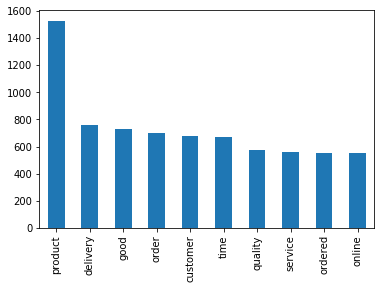

In [13]:
pd.Series(' '.join(data['Review']).split()).value_counts()[:10].plot('bar')

In [14]:
file = open('/home/nexg/Desktop/sf_shared/Online_Review_New.csv', 'r')
words = (file.read())
print words

S.no ,Review,NEGATIVE...POSITIVE
1,I have purchased a mobile phone (Samsung J7) on Amazon on 29th Oct'17. The phone is very good in user experience and appearance. Amazon store always provides the best to their customer and I am using it services from last three years.,POSITIVE
2,"I have ordered lots of electronic gadgets including phone, washing machine and DSLR camera from Amazon site and very happy with the service. view more",POSITIVE
3,I had order a bablet cost 1500 ..on 30oct delivery date was 2nd today it's 4 of the month..i been calling pole r not picking up.i found myself cheated..they should give the product on time..or should inform but they r not bothered.i will not buy anything from Amazon ever n will encourage ppl to not buy coz they r not adhere to the time. ,NEGATIVE
4,"The Best big Giant in India ,Amazon Is the best Store i belive in India.It provides the best Deal. Although Flipkart , paytm Are There but i Still Prefer Amazon over them.",POSITIVE
5,Amazon is the best 

In [15]:
######------------STEMMING-----------


   
ps = PorterStemmer() 
print(data['Review'])
print('stemming')
data['stem_Review']=data['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(data['stem_Review'])

   

0      purchased mobile phone samsung j amazon th oct...
1      ordered lots electronic gadgets including phon...
2      order bablet cost oct delivery date nd today m...
3      best big giant india amazon best store belive ...
4      amazon best time offer product delivered chanc...
5      always amazon giving customers top notch shopp...
6      purchase many item amazon packed well nice del...
7      best big giant india amazon best store belive ...
8      good site timely delivery good packing nice pr...
9                           good product shipping charge
10     amazon amazing whenever thing goes wrong suppo...
11     order promised delivered delayed twice much ti...
12     amazon gurantee delivery cant fulfill promise ...
13     knew days online shopping become popular every...
14     good app shopping customer care behavier good ...
15     amazon india good either better pepole awesome...
16     purchased philips induction cooktop amazon mon...
17     amazon best marketplace 

In [16]:
#####---------LEMMATIZATION---------

lemma=WordNetLemmatizer()
print(data['Review'])
print('lemmatization')
data['lemma_Review']=data['Review'].apply(lambda x: ' '.join([lemma.lemmatize(word,'v') for word in x.split()]))
print(data['lemma_Review'])


0      purchased mobile phone samsung j amazon th oct...
1      ordered lots electronic gadgets including phon...
2      order bablet cost oct delivery date nd today m...
3      best big giant india amazon best store belive ...
4      amazon best time offer product delivered chanc...
5      always amazon giving customers top notch shopp...
6      purchase many item amazon packed well nice del...
7      best big giant india amazon best store belive ...
8      good site timely delivery good packing nice pr...
9                           good product shipping charge
10     amazon amazing whenever thing goes wrong suppo...
11     order promised delivered delayed twice much ti...
12     amazon gurantee delivery cant fulfill promise ...
13     knew days online shopping become popular every...
14     good app shopping customer care behavier good ...
15     amazon india good either better pepole awesome...
16     purchased philips induction cooktop amazon mon...
17     amazon best marketplace 

In [17]:
##### ------PART OF SPEECH TAGGING(POS TAGGING)----  NN=noun,NNS-Noun plural, VB=verb, RB=adverb, VBD=past-tense-verb,JJ-Adjective,VBZ-Verb, 3rd person singular present

##print(data['Review'])
print('PART OF SPEECH TAGGING')
data['tagged_Review']=data['Review'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
print(data['tagged_Review'])

PART OF SPEECH TAGGING
0      [(purchased, VBN), (mobile, JJ), (phone, NN), ...
1      [(ordered, VBN), (lots, NNS), (electronic, JJ)...
2      [(order, NN), (bablet, NN), (cost, NN), (oct, ...
3      [(best, JJS), (big, JJ), (giant, NN), (india, ...
4      [(amazon, RB), (best, RBS), (time, NN), (offer...
5      [(always, RB), (amazon, RB), (giving, VBG), (c...
6      [(purchase, NN), (many, JJ), (item, NN), (amaz...
7      [(best, JJS), (big, JJ), (giant, NN), (india, ...
8      [(good, JJ), (site, NN), (timely, JJ), (delive...
9      [(good, JJ), (product, NN), (shipping, VBG), (...
10     [(amazon, NN), (amazing, VBG), (whenever, WRB)...
11     [(order, NN), (promised, VBN), (delivered, VBN...
12     [(amazon, JJ), (gurantee, NN), (delivery, NN),...
13     [(knew, JJ), (days, NNS), (online, VBP), (shop...
14     [(good, JJ), (app, NN), (shopping, VBG), (cust...
15     [(amazon, IN), (india, RB), (good, JJ), (eithe...
16     [(purchased, VBN), (philips, NNS), (induction,...
17     [

In [18]:
data.head(10)

,S.no,Review,NEGATIVE...POSITIVE,stopwords,stem_Review,lemma_Review,tagged_Review
0,1,purchased mobile phone samsung j amazon th oct...,POSITIVE,18,purchas mobil phone samsung j amazon th oct ph...,purchase mobile phone samsung j amazon th oct ...,"[(purchased, VBN), (mobile, JJ), (phone, NN), ..."
1,2,ordered lots electronic gadgets including phon...,POSITIVE,10,order lot electron gadget includ phone wash ma...,order lot electronic gadgets include phone was...,"[(ordered, VBN), (lots, NNS), (electronic, JJ)..."
2,3,order bablet cost oct delivery date nd today m...,NEGATIVE,35,order bablet cost oct deliveri date nd today m...,order bablet cost oct delivery date nd today m...,"[(order, NN), (bablet, NN), (cost, NN), (oct, ..."
3,4,best big giant india amazon best store belive ...,POSITIVE,14,best big giant india amazon best store beliv i...,best big giant india amazon best store belive ...,"[(best, JJS), (big, JJ), (giant, NN), (india, ..."
4,5,amazon best time offer product delivered chanc...,POSITIVE,8,amazon best time offer product deliv chanc cancel,amazon best time offer product deliver chance ...,"[(amazon, RB), (best, RBS), (time, NN), (offer..."
5,6,always amazon giving customers top notch shopp...,POSITIVE,108,alway amazon give custom top notch shop experi...,always amazon give customers top notch shop ex...,"[(always, RB), (amazon, RB), (giving, VBG), (c..."
6,7,purchase many item amazon packed well nice del...,POSITIVE,30,purchas mani item amazon pack well nice deleiv...,purchase many item amazon pack well nice delei...,"[(purchase, NN), (many, JJ), (item, NN), (amaz..."
7,8,best big giant india amazon best store belive ...,POSITIVE,14,best big giant india amazon best store beliv i...,best big giant india amazon best store belive ...,"[(best, JJS), (big, JJ), (giant, NN), (india, ..."
8,9,good site timely delivery good packing nice pr...,POSITIVE,1,good site time deliveri good pack nice product,good site timely delivery good pack nice products,"[(good, JJ), (site, NN), (timely, JJ), (delive..."
9,10,good product shipping charge,POSITIVE,2,good product ship charg,good product ship charge,"[(good, JJ), (product, NN), (shipping, VBG), (..."


In [19]:
noun = []
adjective = []
for i in data['tagged_Review']:
    #print "in for"
    for j in range(len(i)):
        #print "in 2 for"
        if i[j][1] == "NN":
            noun.append(i[j][0])
#             print "noun:",noun
        elif i[j][1] == "JJ" and "JJS":
            adjective.append(i[j][0])
print "noun",noun
print "****************************************"
print "adjective",adjective

noun ['phone', 'samsung', 'j', 'amazon', 'th', 'phone', 'user', 'experience', 'appearance', 'amazon', 'store', 'customer', 'phone', 'machine', 'dslr', 'camera', 'amazon', 'site', 'service', 'view', 'order', 'bablet', 'cost', 'delivery', 'date', 'today', 'month', 'r', 'product', 'time', 'r', 'anything', 'encourage', 'ppl', 'r', 'time', 'giant', 'india', 'amazon', 'store', 'india', 'deal', 'flipkart', 'paytm', 'amazon', 'time', 'offer', 'product', 'cancellation', 'notch', 'shopping', 'experience', 'customer', 'amazon', 'review', 'go', 'product', 'quality', 'arena', 'tshirt', 'worth', 'cloud', 'tail', 'order', 'service', 'order', 'delivery', 'pay', 'balance', 'item', 'size', 'bit', 'refund', 'request', 'refund', 'pay', 'balance', 'pickup', 'refund', 'request', 'come', 'amount', 'goodwill', 'card', 'win', 'purchase', 'pros', 'pickup', 'refundscompensation', 'delay', 'customer', 'careperfect', 'shipping', 'time', 'number', 'discount', 'coupon', 'review', 'purchase', 'item', 'amazon', 'delei

In [20]:
freq = pd.Series(' '.join(noun).split()).value_counts()[:10].to_frame(name='noun Frequency').rename_axis('word',1)
print freq
freq_1 = pd.Series(' '.join(adjective).split()).value_counts()[:20].to_frame(name='adjective Frequency').rename_axis('word',1)
print freq_1


word        noun Frequency
product               1527
delivery               762
order                  707
customer               680
time                   673
service                552
quality                528
site                   466
experience             410
shopping               303
word       adjective Frequency
good                       721
website                    243
many                       235
bad                        232
online                     185
last                       133
available                  126
first                      121
different                  121
big                        112
myntra                     110
great                      107
happy                      104
snapdeal                   104
amazon                      95
poor                        84
much                        82
app                         75
nice                        69
next                        68


word cloud of review


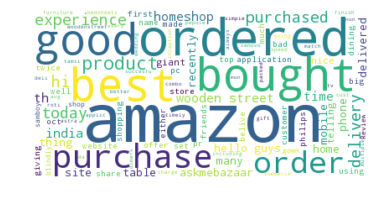

In [21]:
wordcloud = WordCloud(max_font_size = 80,max_words = 100, background_color = "white").generate(str(data['Review']))
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
print  'word cloud of review'
plt.show()

word cloud of noun


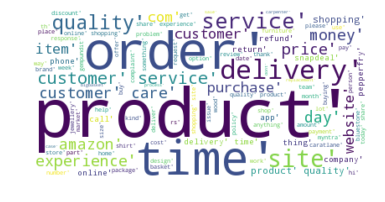

In [22]:
wordcloud = WordCloud(max_font_size = 80,max_words = 100, background_color = "white").generate(str(noun))
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
print  'word cloud of noun'
plt.show()

word cloud of adjective


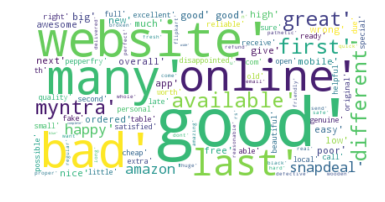

In [23]:
wordcloud = WordCloud(max_font_size = 80,max_words = 100, background_color = "white").generate(str(adjective))
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
print  'word cloud of adjective'
plt.show()

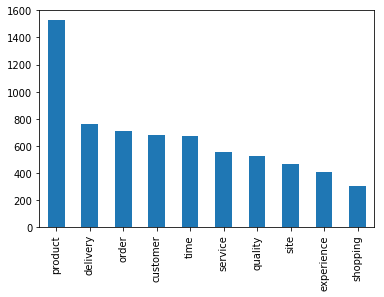

In [24]:
#####--------frequency chart of noun-----------------
pd.Series(' '.join(noun).split()).value_counts()[:10].plot('bar')

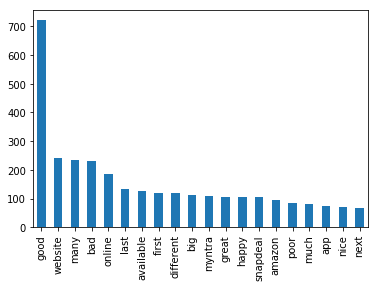

In [25]:
#######----------frequency chart of adjective---------------------------
pd.Series(' '.join(adjective).split()).value_counts()[:20].plot('bar')

In [26]:
########----------sentiment analysis----------------

data['sentiment'] = data['Review'].apply(lambda x: TextBlob(x).sentiment[0] )
new=data[['Review','sentiment']]
new[0:]

,Review,sentiment
0,purchased mobile phone samsung j amazon th oct...,0.566667
1,ordered lots electronic gadgets including phon...,0.800000
2,order bablet cost oct delivery date nd today m...,0.000000
3,best big giant india amazon best store belive ...,0.600000
4,amazon best time offer product delivered chanc...,1.000000
5,always amazon giving customers top notch shopp...,0.247807
6,purchase many item amazon packed well nice del...,0.400000
7,best big giant india amazon best store belive ...,0.600000
8,good site timely delivery good packing nice pr...,0.666667
9,good product shipping charge,0.700000


In [27]:
new.head(10)

,Review,sentiment
0,purchased mobile phone samsung j amazon th oct...,0.566667
1,ordered lots electronic gadgets including phon...,0.800000
2,order bablet cost oct delivery date nd today m...,0.000000
3,best big giant india amazon best store belive ...,0.600000
4,amazon best time offer product delivered chanc...,1.000000
5,always amazon giving customers top notch shopp...,0.247807
6,purchase many item amazon packed well nice del...,0.400000
7,best big giant india amazon best store belive ...,0.600000
8,good site timely delivery good packing nice pr...,0.666667
9,good product shipping charge,0.700000


In [28]:
new_1=new['sentiment']
new_1

0      0.566667
1      0.800000
2      0.000000
3      0.600000
4      1.000000
5      0.247807
6      0.400000
7      0.600000
8      0.666667
9      0.700000
10     0.346429
11     0.033333
12    -0.475000
13     0.707500
14     0.533333
15     0.660000
16     0.200000
17     0.141667
18     0.620000
19     0.150000
20    -0.650000
21     0.455102
22     0.137500
23     0.250000
24     0.000000
25    -0.141667
26     0.040278
27     0.286364
28    -0.400000
29    -0.100000
         ...   
970    0.363312
971    0.243571
972    0.550000
973    0.259375
974    0.148065
975    0.160000
976    0.090625
977    0.256818
978    0.363258
979    0.262500
980    0.300000
981   -0.157143
982   -0.082407
983   -0.291515
984    0.004167
985    0.404545
986   -0.385714
987    0.133333
988    0.363889
989   -0.283036
990    0.044444
991   -0.142857
992   -0.094034
993    0.119048
994   -0.036111
995    0.000000
996    0.444444
997    0.533333
998    0.383333
999    0.500000
Name: sentiment, Length:

In [29]:
##### -------------mean of sentiments------------
new_1.mean()

0.1650341314316298

In [30]:
##------------prediction of reviews(positive,negative,neutral) ------

data["review_prediction"] = new['sentiment'].apply(lambda x: (1 if x > 0.5 
                                                                                    else 0 if x < -0.5 else 2 ))
data = data[["Review", "review_prediction"]]
data

,Review,review_prediction
0,purchased mobile phone samsung j amazon th oct...,1
1,ordered lots electronic gadgets including phon...,1
2,order bablet cost oct delivery date nd today m...,2
3,best big giant india amazon best store belive ...,1
4,amazon best time offer product delivered chanc...,1
5,always amazon giving customers top notch shopp...,2
6,purchase many item amazon packed well nice del...,2
7,best big giant india amazon best store belive ...,1
8,good site timely delivery good packing nice pr...,1
9,good product shipping charge,1


In [31]:
a = pd.get_dummies(data['review_prediction'], prefix = "review_prediction")      ###### categorical data 


In [32]:
frames = [data, a]
df = pd.concat(frames, axis = 1)
df.head()

,Review,review_prediction,review_prediction_0,review_prediction_1,review_prediction_2
0,purchased mobile phone samsung j amazon th oct...,1,0,1,0
1,ordered lots electronic gadgets including phon...,1,0,1,0
2,order bablet cost oct delivery date nd today m...,2,0,0,1
3,best big giant india amazon best store belive ...,1,0,1,0
4,amazon best time offer product delivered chanc...,1,0,1,0


In [33]:
df = df.drop(['review_prediction'],axis=1)
df.head()

,Review,review_prediction_0,review_prediction_1,review_prediction_2
0,purchased mobile phone samsung j amazon th oct...,0,1,0
1,ordered lots electronic gadgets including phon...,0,1,0
2,order bablet cost oct delivery date nd today m...,0,0,1
3,best big giant india amazon best store belive ...,0,1,0
4,amazon best time offer product delivered chanc...,0,1,0


In [34]:
data

,Review,review_prediction
0,purchased mobile phone samsung j amazon th oct...,1
1,ordered lots electronic gadgets including phon...,1
2,order bablet cost oct delivery date nd today m...,2
3,best big giant india amazon best store belive ...,1
4,amazon best time offer product delivered chanc...,1
5,always amazon giving customers top notch shopp...,2
6,purchase many item amazon packed well nice del...,2
7,best big giant india amazon best store belive ...,1
8,good site timely delivery good packing nice pr...,1
9,good product shipping charge,1


In [35]:
#######-----------------------------------term document matrix-------------------------------------

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = data['Review']


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

df= pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,aa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aap,aashirvaad,ab,aback,abd,able,abloom,aboard,...,zero,zeroed,ziox,zip,zipper,zone,zoomed,zrar,zuari,zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df1 = df.drop(['aa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'],axis=1)
df1

,aap,aashirvaad,ab,aback,abd,able,abloom,aboard,abought,abrexo,...,zero,zeroed,ziox,zip,zipper,zone,zoomed,zrar,zuari,zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#######------------ adding sentiments to the column-----------------------

idx = 0
sentiments = new_1  # can be a list, a Series, an array or a scalar   
df1.insert(loc=idx, column='sentiment', value=sentiments)
df1

,sentiment,aap,aashirvaad,ab,aback,abd,able,abloom,aboard,abought,...,zero,zeroed,ziox,zip,zipper,zone,zoomed,zrar,zuari,zw
0,0.566667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.800000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.600000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.247807,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.400000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.600000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.700000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df1.iloc[:, 1:].values
y = df1.iloc[:, 0].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [40]:
from sklearn import utils
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[258 152 118 450 697 372 304 139 488 621 276 109 197 637 636 110 465 440
  96 281 347  77 489 492 194 376 240 410 694 140 198 206 272 600 474  64
  32 243  93 257 228 516 359 122  83 683  65 198 125 184 256 209  20 649
 270 384 173 613 614 499 638 254 134 673 653 290 221 102 371 379 195 120
 563 569 430 393 712 530 593 411 595  43  58  33 425 103 361 701 660 525
 302 694 585 518 279 104 556 204  22 519 535  73 230  55 406 369 506  33
  23 662 198 654  48   0 360 586 198 332 107 337 277 467 570 236 576 528
 619 128 145 691 501 426 431 439 686  12  25 354 159 198 395  99  72   3
 679 239 114 259 675 111 472 196 244 265 401 566  28 623 468 568 149 340
 176 362 446 550 588 470 248 349 554 645 269 438  62 158 104   5 135 490
  91  17 656 408 388 604 460 336 622 231 452 456 322  71 210 202 420 356
 476  94  69 261 536 192 555 167 309 289 346 699 591  87 523 579 311 432
  54 355 626 495 126 464  39  68 150 556 403 631 427 381 540 296  56 513
 596 665 684 318 626 354 249 487 201 262  92 612 31

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train_encoded)
knn.score(X_train,y_train_encoded)

0.2575

In [42]:
from sklearn.svm import SVC
sv=SVC(random_state=10)
sv.fit(X_train,y_train_encoded)
sv.score(X_train,y_train_encoded)

0.015

In [43]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(X_train,y_train_encoded)
mb.score(X_train,y_train_encoded)

0.9875

In [44]:
from sklearn.naive_bayes import BernoulliNB
bb=BernoulliNB()
bb.fit(X_train,y_train_encoded)
bb.score(X_train,y_train_encoded)

0.015

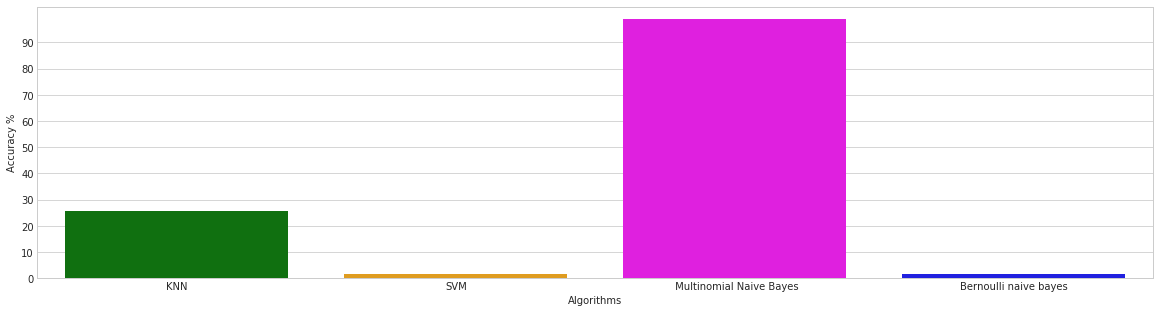

In [45]:
methods = [ "KNN", "SVM", " Multinomial Naive Bayes","Bernoulli naive bayes"]
accuracy = [ 25.75, 1.5,98.75,1.5]
colors = ["green", "orange", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()